In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #make import on your end
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Generate synthetic data
data = pd.read_csv('https://raw.githubusercontent.com/josephgitau/sept/main/Employee.csv')

data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
# Reshape data for scikit-learn
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [4]:
# encode the categorical variables

cat_columns = data.select_dtypes(include=['object']).columns

# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# instantiate the encoder
encoder = OrdinalEncoder()

# fit-transform the data
X[cat_columns] = encoder.fit_transform(X[cat_columns])

# check data
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0.0,2017,0.0,3,34,1.0,0.0,0
1,0.0,2013,2.0,1,28,0.0,0.0,3
2,0.0,2014,1.0,3,38,0.0,0.0,2
3,1.0,2016,0.0,3,27,1.0,0.0,5
4,1.0,2017,2.0,3,24,1.0,1.0,2


In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# model instantiation
knn = KNeighborsClassifier(n_neighbors=6)

# fit the model
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)

In [17]:
sample = X.sample(1)

# print c comparison of the sample and actual
print(f"Predicted: {knn.predict(sample)}")
print(f"Actual: {y.loc[sample.index]}")

Predicted: [0]
Actual: 4223    0
Name: LeaveOrNot, dtype: int64


In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8066595059076263
Confusion Matrix:
[[582  28]
 [152 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       610
           1       0.86      0.53      0.65       321

    accuracy                           0.81       931
   macro avg       0.83      0.74      0.76       931
weighted avg       0.82      0.81      0.79       931



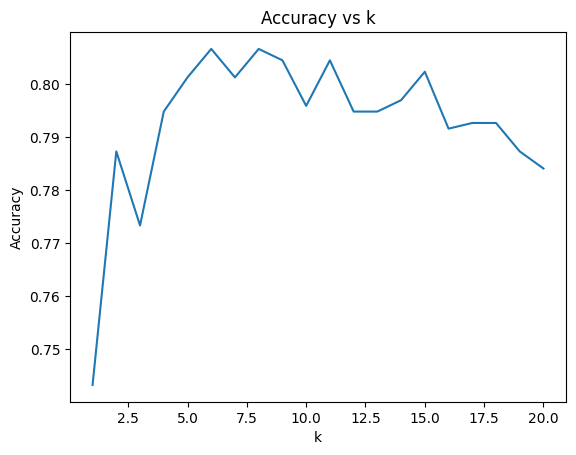

In [11]:
# get the optimal number of neighbors
k = np.arange(1, 21)
accuracies = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

## Assignment

- fit a KNN regression model to one of the class data we worked on (regression)